<span>
<b>Methods Workshop in Quantitative Text Analysis </b><br/>     
<b>Author:</b> <a href="https://github.com/jisukimmmm">Jisu Kim</a><br/>
<b>Python version:</b>  >=3.6<br/>
<b>Last update:</b> 21/05/2024
</span>

<a id='top'></a>
# *Advanced Text analysis in Python - Lexicon-based Sentiment analysis*




## Table of Contents

1. [Simple Dictionary-based model](#dict)
2. [VADER](#vader)<br>
3. [Textblob](#Textblob)<br>

<a id='dict'></a>
## 1. Simple Dictionary-based model([to top](#dict))
>


In [55]:
# Lexicon
lexicon = {"good": 1, "bad": -1, "neutral": 0}

# Sentences
sentence1 = "The movie was good but the ending was bad"
sentence2 = "The movie was good"

# Function to calculate sentiment score for a sentence
def calculate_sentiment_score(sentence):
    words = sentence.lower().split()
    positive_count = sum(1 for word in words if lexicon.get(word, 0) > 0)
    negative_count = sum(1 for word in words if lexicon.get(word, 0) < 0)
    total_words = len(words)
    if total_words == 0:
        return 0  # Return 0 if no words found
    return (positive_count - negative_count) / total_words

# Calculate sentiment scores for each sentence
sentiment_score1 = calculate_sentiment_score(sentence1)
sentiment_score2 = calculate_sentiment_score(sentence2)

print("Sentiment score for sentence 1:", sentiment_score1)
print("Sentiment score for sentence 2:", sentiment_score2)


Sentiment score for sentence 1: 0.0
Sentiment score for sentence 2: 0.25


<a id='vader'></a>
## 2. VADER ([to top](#vader))
>


In [58]:
# %pip install vaderSentiment

In [66]:
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Mock text data
text_data = [
    "I love this product! It's amazing.",
    "The service was terrible. I'm never coming back.",
    "The weather today is so-so.",
    "I'm feeling great today.",
    "This movie is okay, but not great.",
    "The food at that restaurant is fantastic!",
    "I'm really disappointed with the quality of this product.",
    "The customer support team was very helpful.",
]

# VADER Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
vader_scores = [analyzer.polarity_scores(text)["compound"] for text in text_data]

# Print results
print("Text Data and VADER Sentiment Scores:")
for i, (text, score) in enumerate(zip(text_data, vader_scores), 1):
    print(f"{i}. {text} - Sentiment Score: {score:.2f}")

Text Data and VADER Sentiment Scores:
1. I love this product! It's amazing. - Sentiment Score: 0.85
2. The service was terrible. I'm never coming back. - Sentiment Score: -0.48
3. The weather today is so-so. - Sentiment Score: 0.00
4. I'm feeling great today. - Sentiment Score: 0.68
5. This movie is okay, but not great. - Sentiment Score: -0.61
6. The food at that restaurant is fantastic! - Sentiment Score: 0.60
7. I'm really disappointed with the quality of this product. - Sentiment Score: -0.53
8. The customer support team was very helpful. - Sentiment Score: 0.70


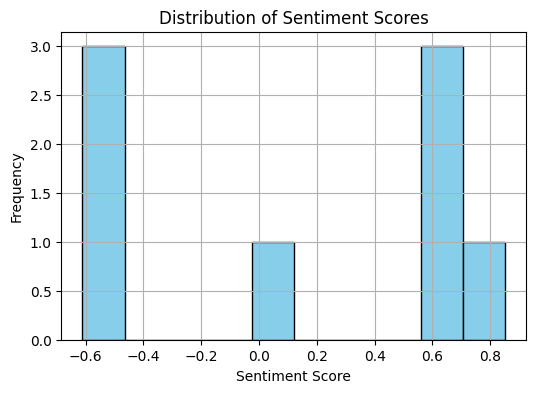

In [67]:
# Distribution plot
plt.figure(figsize=(6, 4))
plt.hist(vader_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(True)
plt.show()

In [73]:
from sklearn.metrics import f1_score

# Mock labels for the text data (positive, negative, neutral)
true_labels = ['positive', 'negative', 'neutral', 'positive', 'neutral', 'positive', 'negative', 'positive']

# Convert VADER scores to labels based on threshold
vader_labels = ['positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral' for score in vader_scores]

# Compute F1 score
f1 = f1_score(true_labels, vader_labels, average='weighted')

print(f"F1 Score: {f1:.2f}")


F1 Score: 0.87


<a id='Textblob'></a>
## 3. Textblob([to top](#Textblob))
>


In [75]:
from textblob import TextBlob

# TextBlob Sentiment Analysis
blob_scores = [TextBlob(text).sentiment.polarity for text in text_data]

# Print results
print("Text Data and TextBlob Sentiment Scores:")
for i, (text, score) in enumerate(zip(text_data, blob_scores), 1):
    print(f"{i}. {text} - Sentiment Score: {score:.2f}")


Text Data and TextBlob Sentiment Scores:
1. I love this product! It's amazing. - Sentiment Score: 0.61
2. The service was terrible. I'm never coming back. - Sentiment Score: -0.50
3. The weather today is so-so. - Sentiment Score: 0.00
4. I'm feeling great today. - Sentiment Score: 0.80
5. This movie is okay, but not great. - Sentiment Score: 0.05
6. The food at that restaurant is fantastic! - Sentiment Score: 0.50
7. I'm really disappointed with the quality of this product. - Sentiment Score: -0.75
8. The customer support team was very helpful. - Sentiment Score: 0.20


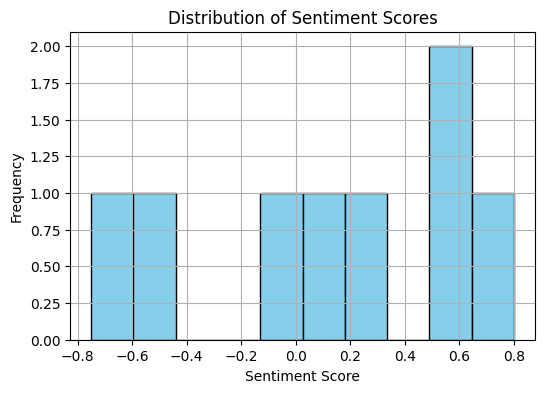

In [71]:
# Distribution plot
plt.figure(figsize=(6, 4))
plt.hist(blob_scores, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(True)
plt.show()

In [74]:
# Convert VADER scores to labels based on threshold
textblob_labels = ['positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral' for score in blob_scores]

# Compute F1 score
f1 = f1_score(true_labels, textblob_labels, average='weighted')

print(f"F1 Score: {f1:.2f}")


F1 Score: 1.00
